In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
from infomap import Infomap
import community # Louvain

import auxfunctions as aux
np.random.seed(42)

In [3]:
archivo = "cmsn_dialanine.graphml"

# Load the network
G = nx.read_graphml(archivo)
name = archivo.split(".")[0]

N = G.number_of_nodes()
M = G.number_of_edges()

print("nodos = ",N)
print("edges = ",M)

print("Weighted:", nx.is_weighted(G))
print("Directed:", nx.is_directed(G))
# print(Gx.is_directed())

nodos =  795
edges =  27576
Weighted: True
Directed: True


(np.float64(-1.0394768573343753),
 np.float64(0.6400844015181064),
 np.float64(-1.1670208871364594),
 np.float64(0.7576960027217865))

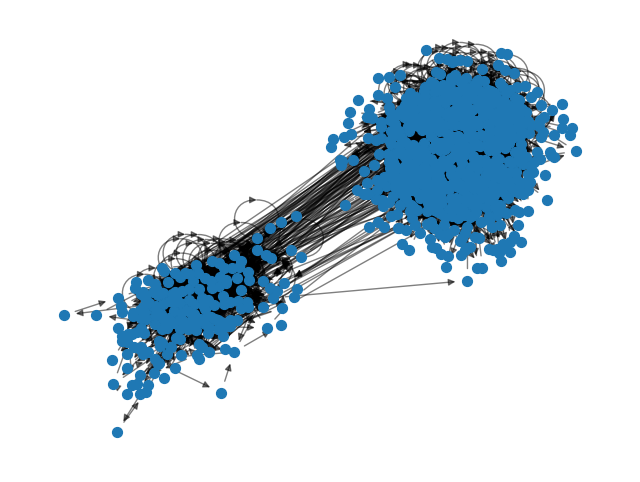

In [4]:
plt.figure(figsize=(8, 6))

# nx.draw(G)
# nx.draw_networkx(G)
# nx.draw(G, pos=nx.spring_layout(G))

pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos=pos, node_size = 50)

plt.axis("off")

# Louvain

In [5]:
Gl = G.to_undirected()

In [6]:
# Run the Louvain algorithm
partition = community.best_partition(Gl)

Writing network figure to output/cmsn_dialanine_Louvain.png
Se encontraron,  18 comunidades.



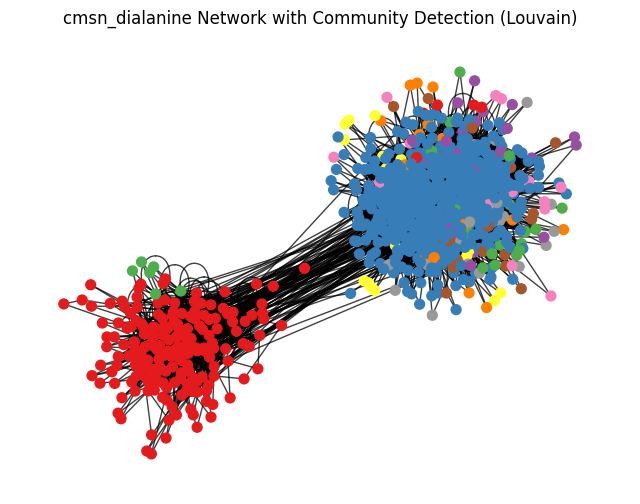

In [7]:
# Draw the network with node colors based on community
pos = nx.spring_layout(Gl, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(Gl, pos, node_color=list(partition.values()), cmap=plt.cm.Set1, node_size=50)
nx.draw_networkx_edges(Gl, pos, alpha=0.75)

plt.title(name+" Network with Community Detection (Louvain)")
plt.axis("off")

plt.axis("off")
pathlib.Path("output").mkdir(exist_ok=True)
output = "output/"+name+"_Louvain.png"

print("Writing network figure to "+output)
plt.savefig(output)

print("Se encontraron, ",len(set(partition.values())),"comunidades.\n")

In [8]:
# Print the nodes and their assigned communities
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

Node (2, 36): Community 15
Node (13, 37): Community 1
Node (10, 38): Community 2
Node (14, 34): Community 2
Node (11, 16): Community 3
Node (7, 14): Community 3
Node (12, 19): Community 3
Node (12, 17): Community 3
Node (9, 19): Community 3
Node (11, 20): Community 3
Node (2, 8): Community 3
Node (10, 17): Community 3
Node (3, 25): Community 3
Node (7, 23): Community 3
Node (11, 18): Community 3
Node (12, 1): Community 2
Node (13, 34): Community 2
Node (13, 36): Community 2
Node (3, 36): Community 2
Node (10, 34): Community 6
Node (7, 38): Community 2
Node (5, 35): Community 3
Node (3, 39): Community 2
Node (5, 36): Community 2
Node (10, 36): Community 5
Node (12, 32): Community 2
Node (3, 38): Community 2
Node (7, 39): Community 2
Node (11, 29): Community 3
Node (6, 35): Community 2
Node (13, 18): Community 3
Node (13, 19): Community 3
Node (7, 37): Community 6
Node (15, 37): Community 2
Node (11, 38): Community 2
Node (12, 38): Community 2
Node (11, 36): Community 2
Node (5, 17): Com

# Infomap

In [4]:
print("Building Infomap network from a NetworkX graph...")
im = Infomap(two_level=True, silent=True, num_trials=20)
im.add_networkx_graph(G)

print("Find communities with Infomap...")
im.run()

print(f"Found {im.num_top_modules} modules with codelength {im.codelength:.8f} bits")

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 26 modules with codelength 7.53890609 bits


Se encontraron 26 comunidades
Writing network figure to output/cmsn_dialanine_Infomap.png


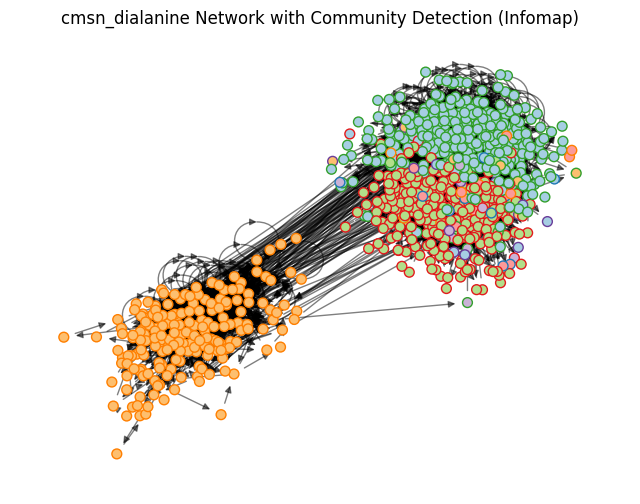

In [5]:
print(f"Se encontraron {im.num_top_modules} comunidades")
aux.draw_network(G,im,name)

In [6]:
im.writeFlowTree(name+".ftree")

'cmsn_dialanine.ftree'